# E07 : Polynomial regression

This week's homework asks you to perform a **regression analysis** on actual data. The aim is to investigate which polynomial regression model best describes the relationship between the independent and the dependent variable. 

We will use real data on yearly wages (in dollars) data for US male workers of different ages collected from the Current Population Survey in 1988. It contains 3000 data-points.

In this homework, we will apply polynomial regression of different orders to the data and we will assess how well the model generalizes to data which was not used in for the fit. For that purpose, we will split the data-set in a training- and a testing- subset. 

#### Loading and visualiztion of the data

The wage data is saved in the numpy file `Wages.npy`. We start out by loading the file (using `np.load()`) and visualizing the data. 

(3000, 2)


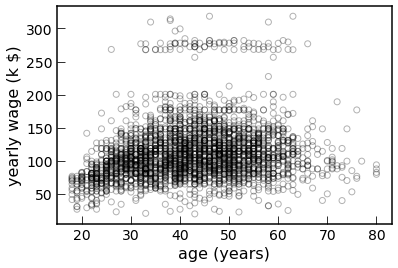

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

data = np.load('Wages.npy')
print(np.shape(data))
data_x = data[:,0]
data_y = data[:,1]

plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel('age (years)',fontsize=16)
plt.ylabel('yearly wage (k $)',fontsize=16)
plt.show()

#### Generate train and test data-sets

We split the data into random **training** and **testing subsets**. The regression models will be fitted using the traning subset, while the testing data will be used to evaluate the respective model and compare different polynomial regression methods. Scikit-learn provides a function for exactly that purpose, i.e., splitting the data into a traning and a test subset : `train_test_split(x,y,test_size=[fraction],random_state=[integer])`. Here, we will use 60 % of the data-points for traning and 40 % for testing, i.e., `test_size=0.4` in `train_test_split()`.

In [87]:
trainData_x, testData_x, trainData_y, testData_y = train_test_split(data_x, data_y, test_size=0.4, random_state = 2)

**Homework assignement**

1. Apply polynomial regression to the age vs. wage data. Use age as independent variable and wage as dependent variable. Use *polynomials of order 1, 3, 6, 8, 16 and 32* to fit the data. Remember to use the training dataset for fitting the regression model. <br> **Hint :** Check out the code from tutotrial *T7 - Regression analysis* for an example of how to use the numpy `np.polyfit()` and `np.polyval()` functions for polynomial regression. Use a loop over the different polynomial orders to perform the regression. 

/home/mgraupe/.anaconda3/envs/miniscope/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mgraupe/.anaconda3/envs/miniscope/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


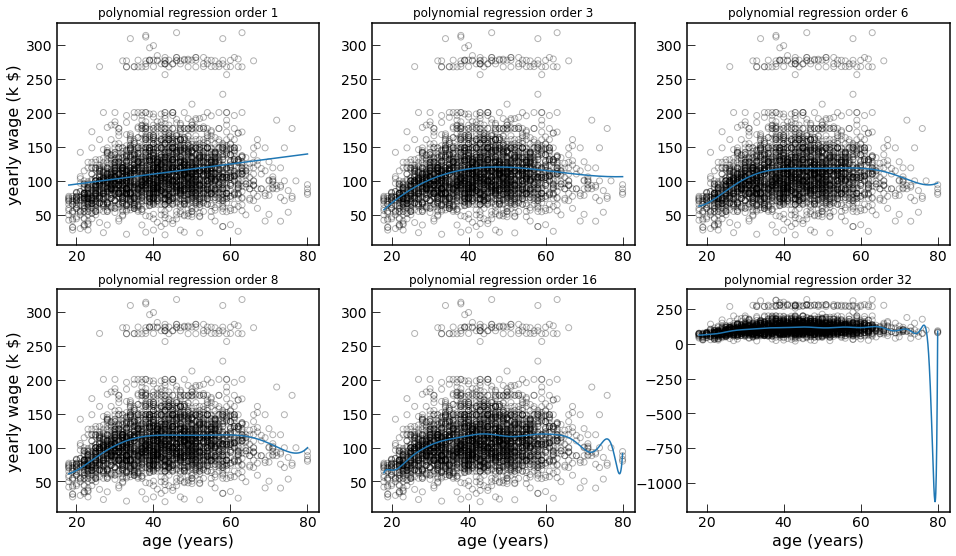

In [88]:
# your code goes here 

polyOrders = [1,3,6,8,16,32]

RsquaredList = []

fig = plt.figure(figsize=(16,9))

xValues = np.linspace(min(data_x),max(data_x),1000)

for i in np.arange(len(polyOrders)):
    coeffs = np.polyfit(trainData_x, trainData_y, polyOrders[i])
    
    y_pred =  np.polyval(coeffs,xValues)

    ax = fig.add_subplot(2,3,(i+1))
    ax.set_title('polynomial regression order %s' % polyOrders[i])
    ax.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.3)
    ax.plot(xValues, y_pred)
    if i > 2:
        ax.set_xlabel('age (years)',fontsize=16)
    if not i%3:
        ax.set_ylabel('yearly wage (k $)',fontsize=16)


2. For each order of the polynomial regressions, calculate the *training mean-squared error* and the *test mean-squared error*, i.e., the MSE for the training- and the test data subsets. <br> **Hint :** You can use the scikit-learn function  `mean_squared_error([y_true],[y_prediction])` to calculate the MSE, which takes the actual (true) y and the predicted (from the regression) y as input arguments. Remember from class that the MSE is the some of squares of the residuals divided by the number of data-points (in case you want to calculate the MSE by hand). 

In [89]:
# your code goes here 
mseList = []

for i in np.arange(len(polyOrders)):
    coeffs = np.polyfit(trainData_x, trainData_y, polyOrders[i])
    
    trainData_y_pred =  np.polyval(coeffs,trainData_x)
    testData_y_pred =  np.polyval(coeffs,testData_x)
    
    
    mseTrain = mean_squared_error(trainData_y,trainData_y_pred)
    mseTest = mean_squared_error(testData_y,testData_y_pred)
    mseList.append([polyOrders[i],mseTrain,mseTest])

print(mseList)

[[1, 1691.2150516162078, 1648.773035075756], [3, 1617.3208191217823, 1556.7459615205253], [6, 1613.5890560293942, 1553.0673290626157], [8, 1613.509716029881, 1552.2517910267588], [16, 1610.8231005929792, 1553.970518990799], [32, 1607.7829283613116, 1558.0758081752897]]


/home/mgraupe/.anaconda3/envs/miniscope/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mgraupe/.anaconda3/envs/miniscope/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


3. Plot the *training mean-squared error* and the *test mean-squared error* both in the same graph as function of the polynomial order. Based on this plot, which regression model would you chose to capture the relationship between age and wage *in general*?

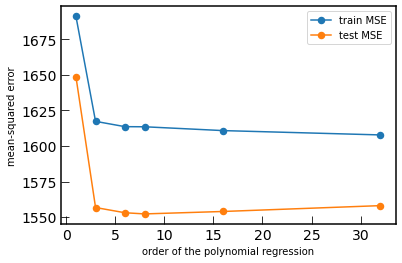

In [90]:
# your code goes here 

mseList = np.asarray(mseList)

plt.plot(mseList[:,0],mseList[:,1],'o-',label='train MSE')
plt.plot(mseList[:,0],mseList[:,2],'o-',label='test MSE')
plt.xlabel('order of the polynomial regression')
plt.ylabel('mean-squared error')
plt.legend()

In [92]:
mseList

array([[1.00000000e+00, 1.69121505e+03, 1.64877304e+03],
       [3.00000000e+00, 1.61732082e+03, 1.55674596e+03],
       [6.00000000e+00, 1.61358906e+03, 1.55306733e+03],
       [8.00000000e+00, 1.61350972e+03, 1.55225179e+03],
       [1.60000000e+01, 1.61082310e+03, 1.55397052e+03],
       [3.20000000e+01, 1.60778293e+03, 1.55807581e+03]])

The polynomial regression of order 8 yields the lowest test MSE. It therefore captures best the relationship between age and wage in general.
Note that the training MSE keeps decreasing for the training dataset which means that the regression models improve in capturing the particularities of the training dataset, while failing to be generalizable.